In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df = pd.read_pickle('./data/final_df_reducted')

In [10]:
df.head()

,WindSpeedX,WindSpeedY,WindSpeedZ,Kp,ap,0,1,2,3,4,5,6,7,8,9
0,1.487795,-0.359055,-6.386987,3.579217,7.013861,-0.478411,5.327612,3.880516,1.496256,0.547225,0.290276,1.396450,-0.043077,-0.015908,0.263943
1,1.152662,-1.184712,-4.362110,3.035520,4.670888,-7.719191,-9.171954,-6.021901,-8.260704,-2.091493,-1.590709,-1.242018,1.314690,-0.516864,0.771234
2,1.479125,-1.773211,-3.120826,2.764079,3.889897,-7.922941,-9.369014,-5.844717,-8.099330,-2.344531,-1.963088,-1.132757,1.329886,-0.545780,0.923703
3,1.258180,-2.165994,1.479697,1.405243,0.961181,-0.725512,3.627122,0.693456,0.105023,1.731850,0.614801,1.022094,0.650102,0.184196,-0.386611
4,2.196549,-1.937583,-0.392775,0.047223,-0.210305,-7.963528,-9.560413,-5.621810,-7.833229,-2.178333,-2.433746,-1.084652,1.261411,-0.699137,1.024333


In [11]:
X1 = df[["WindSpeedX", "WindSpeedY", "WindSpeedZ", "ap", "Kp"]]
X2 = df.iloc[:,5:]
X = pd.concat((X2,X1), axis = 1).values

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, int(len(X)*0.8)):
    X_train.append(X[i-60:i, :])
    y_train.append(X[i, 14])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 15))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 15)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=5,            
                               restore_best_weights=True)  

# Entrenar el modelo con EarlyStopping
regressor.fit(X_train, y_train, 
              epochs=20,                     # Número máximo de épocas
              validation_split=0.2, callbacks=[early_stopping]) 

Epoch 1/20
342/342 [==============================] - 56s 126ms/step - loss: 0.0189 - val_loss: 0.0151
Epoch 2/20
342/342 [==============================] - 43s 126ms/step - loss: 0.0131 - val_loss: 0.0109
Epoch 3/20
342/342 [==============================] - 46s 133ms/step - loss: 0.0104 - val_loss: 0.0085
Epoch 4/20
342/342 [==============================] - 40s 117ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 5/20
342/342 [==============================] - 40s 117ms/step - loss: 0.0088 - val_loss: 0.0078
Epoch 6/20
342/342 [==============================] - 45s 132ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 7/20
342/342 [==============================] - 42s 124ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 8/20
342/342 [==============================] - 41s 119ms/step - loss: 0.0081 - val_loss: 0.0075
Epoch 9/20
342/342 [==============================] - 42s 122ms/step - loss: 0.0079 - val_loss: 0.0072
Epoch 10/20
342/342 [==============================] - 41s 121ms/step - l

108/108 [==============================] - 34s 297ms/step


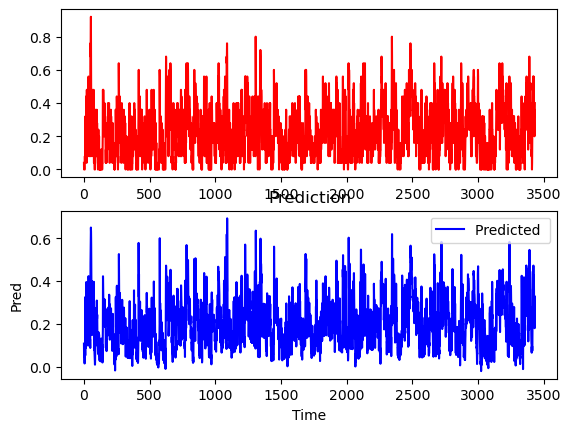

In [13]:
X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i, :])
    y_test.append(X[i, 14])
X_test, y_test = np.array(X_test), np.array(y_test)

y_pred = regressor.predict(X_test)

plt.subplot(2,1,1)
plt.plot(y_test, color = 'red', label = 'Test')
plt.subplot(2,1,2)
plt.plot(y_pred, color = 'blue', label = 'Predicted ')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Pred')
plt.legend()
plt.show()

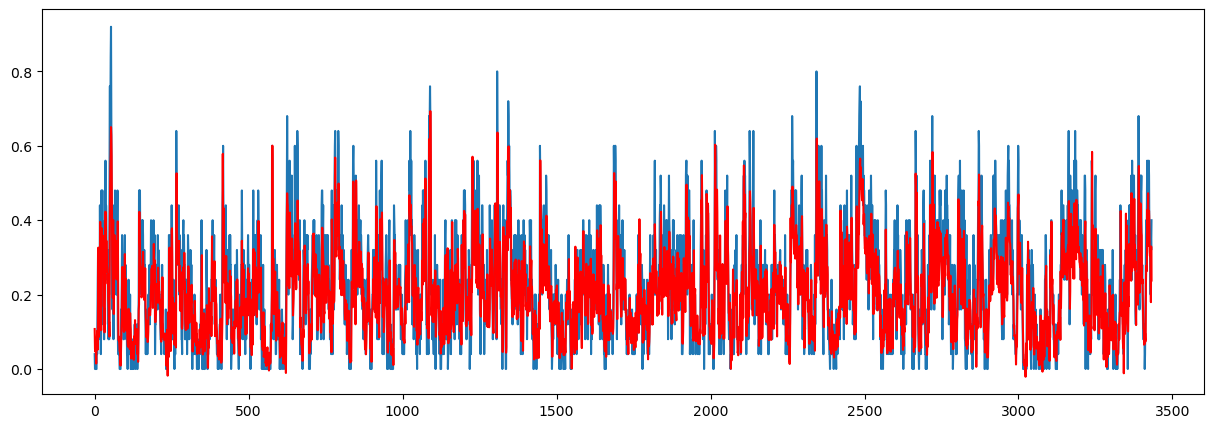

In [16]:
plt.figure(figsize = (15,5))
plt.plot(y_test)
plt.plot(y_pred,c='r')

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, int(len(X)*0.8)):
    X_train.append(X[i-60:i, :])
    y_train.append(X[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 15))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 15)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 15))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=5,            
                               restore_best_weights=True)  

# Entrenar el modelo con EarlyStopping
regressor.fit(X_train, y_train, 
              epochs=20,                     # Número máximo de épocas
              validation_split=0.2, callbacks=[early_stopping]) 


X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i, :])
    y_test.append(X[i, :])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = regressor.predict(X_test)

Epoch 1/20
342/342 [==============================] - 63s 151ms/step - loss: 0.0116 - val_loss: 0.0044
Epoch 2/20
342/342 [==============================] - 47s 139ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 3/20
342/342 [==============================] - 47s 139ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 4/20
342/342 [==============================] - 46s 134ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 5/20
342/342 [==============================] - 47s 137ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 6/20
342/342 [==============================] - 49s 143ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 7/20
342/342 [==============================] - 50s 147ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/20
342/342 [==============================] - 48s 139ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/20
342/342 [==============================] - 46s 135ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/20
342/342 [==============================] - 49s 143ms/step - l

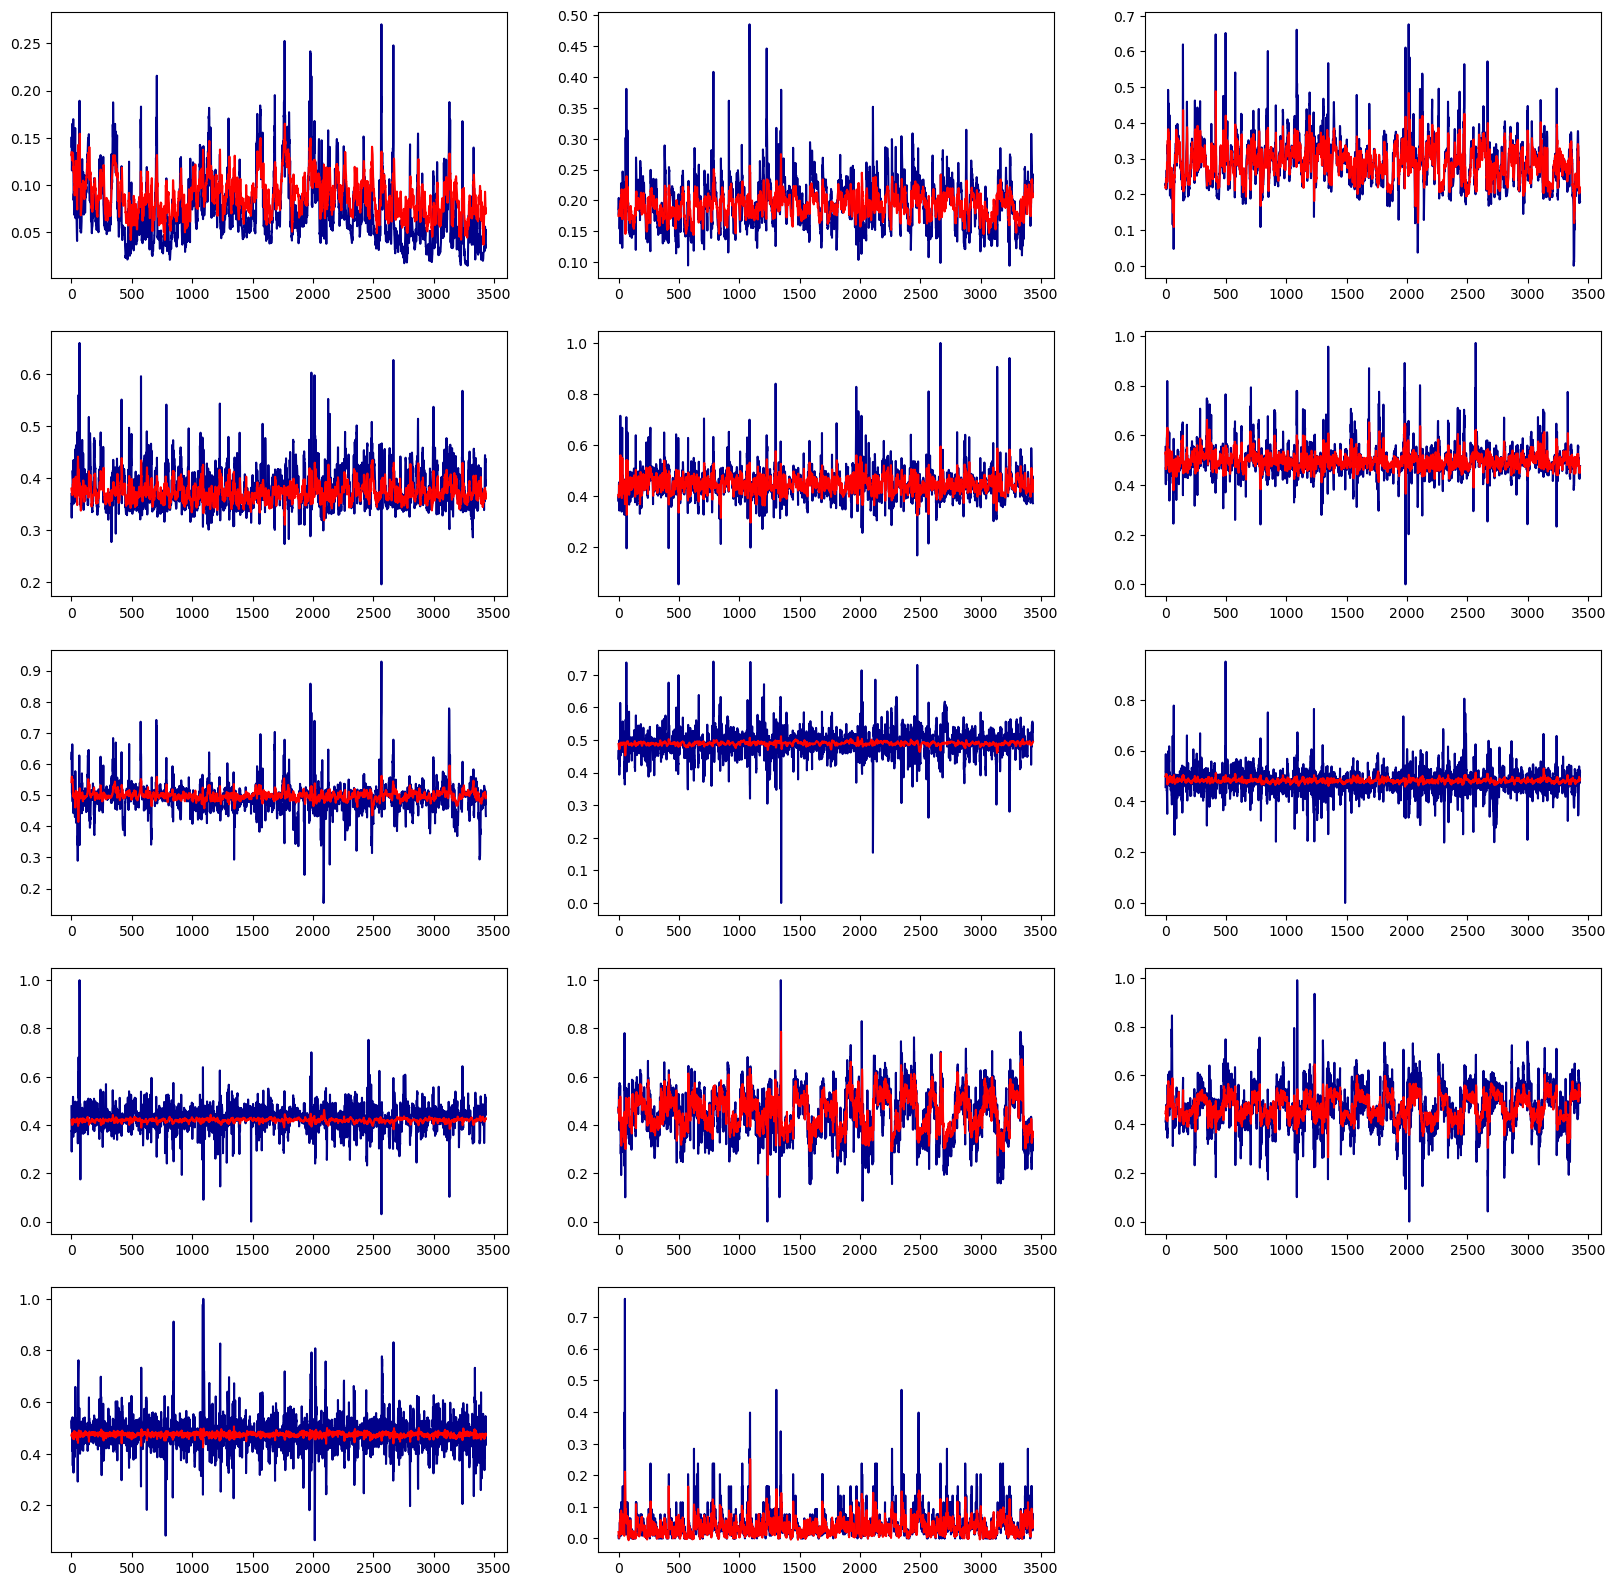

In [26]:
plt.figure(figsize=(20,20))
for j in range(1,15):
    plt.subplot(5,3,j)
    plt.plot(y_test[:,j-1], color = "darkblue")
    plt.plot(y_pred[:,j-1], color = "red")
plt.show()

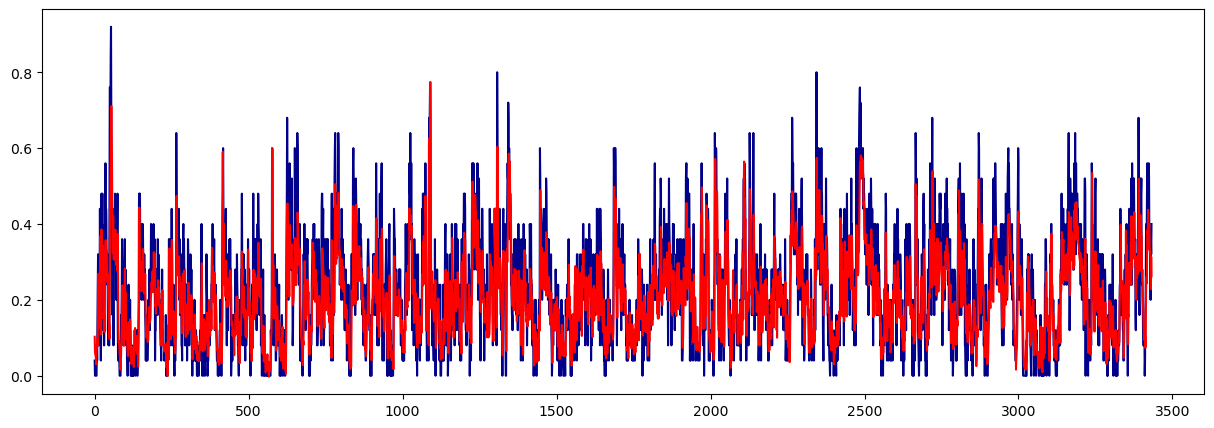

In [22]:
plt.figure(figsize=(15,5))
plt.plot(y_test[:,14], color = "darkblue")
plt.plot(y_pred[:,14], color = "red")
plt.show()

Epoch 1/50
342/342 [==============================] - 62s 146ms/step - loss: 0.0163 - val_loss: 0.0129
Epoch 2/50
342/342 [==============================] - 48s 139ms/step - loss: 0.0115 - val_loss: 0.0093
Epoch 3/50
342/342 [==============================] - 48s 141ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 4/50
342/342 [==============================] - 49s 142ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 5/50
342/342 [==============================] - 49s 142ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 6/50
342/342 [==============================] - 48s 141ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 7/50
342/342 [==============================] - 49s 143ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 8/50
342/342 [==============================] - 50s 146ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 9/50
342/342 [==============================] - 47s 138ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 10/50
342/342 [==============================] - 44s 130ms/step - l

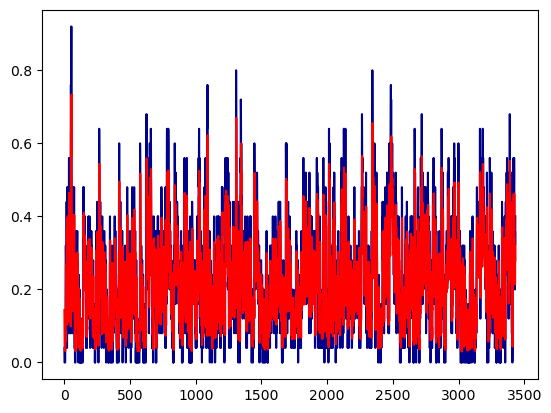

In [27]:
X = X[:,14]
X = np.reshape(X, (X.shape[0], 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, int(len(X)*0.8)):
    X_train.append(X[i-60:i])
    y_train.append(X[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=7,            
                               restore_best_weights=True)  

# Entrenar el modelo con EarlyStopping
regressor.fit(X_train, y_train, 
              epochs=50,                     # Número máximo de épocas
              validation_split=0.2, callbacks=[early_stopping]) 


X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i])
    y_test.append(X[i])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = regressor.predict(X_test)



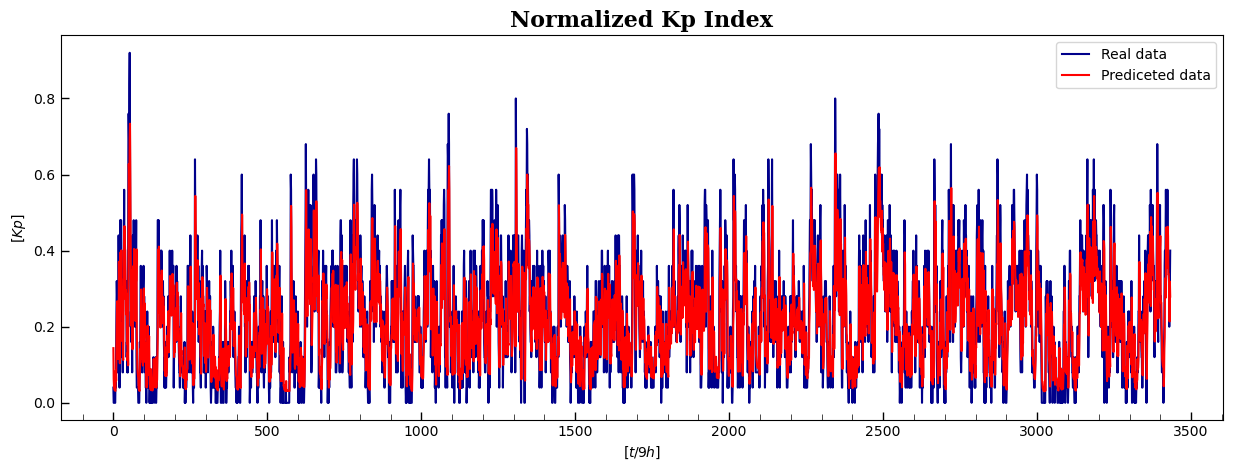

In [29]:
from matplotlib.ticker import MultipleLocator
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(figsize=(15,5))
title_font = FontProperties(family='serif', style='normal', size=16, weight='bold')
ax.set_title('Normalized Kp Index', fontproperties=title_font)
plt.ylabel(r"$[Kp]$")
plt.xlabel(r"$[t/3h]$")
plt.tick_params(axis='both', direction='in', length=6, width=1)
# ax = plt.gca()  # Obtener el objeto del eje actual
minor_locator_x = MultipleLocator(100)  # Ubicación de las subdivisiones en el eje x
ax.xaxis.set_minor_locator(minor_locator_x)
ax.tick_params(axis='x', which='minor', direction='in', length=4, width=0.5)
minor_locator_y = MultipleLocator(20)  # Ubicación de las subdivisiones en el eje y
ax.yaxis.set_minor_locator(minor_locator_y)
ax.tick_params(axis='y', which='minor', direction='in', length=4, width=0.5)

plt.plot(y_test, color = "darkblue", label = "Real data",)
plt.plot(y_pred, color = "red", label = "Prediceted data")
plt.legend()
plt.show()